In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.pyplot import imread
import seaborn as sns
from PIL import Image
style.use("fivethirtyeight")
import os
import random

In [2]:
fruits="C:\\Users\\personal\\Desktop\\Transfer learning\\fruits-360"

In [3]:
os.listdir(fruits)

['LICENSE', 'papers', 'readme.md', 'Test', 'test-multiple_fruits', 'Training']

In [4]:
train_path=fruits+"\\Training\\"
test_path=fruits+"\\Test\\"
smallfruits="C:\\Users\\personal\\Desktop\\Transfer learning"
train_path_smalldataset=smallfruits+"\\smalldataset"+"\\Training set\\"
test_path_smalldataset=smallfruits+"\\smalldataset"+"\\Testing set\\"

In [5]:
print(f"no of classes {len(os.listdir(train_path_smalldataset))}")
print(os.listdir(train_path_smalldataset))

no of classes 8
['Banana', 'Lemon', 'Onion White', 'Pineapple', 'Raspberry', 'Strawberry', 'Tomato 1', 'Watermelon']


In [6]:
print(f"no of classes {len(os.listdir(train_path))}")
print(os.listdir(train_path))

no of classes 131
['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan',

In [7]:
print(f"no of classes {len(os.listdir(test_path))}")
print(os.listdir(test_path))

no of classes 131
['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan',

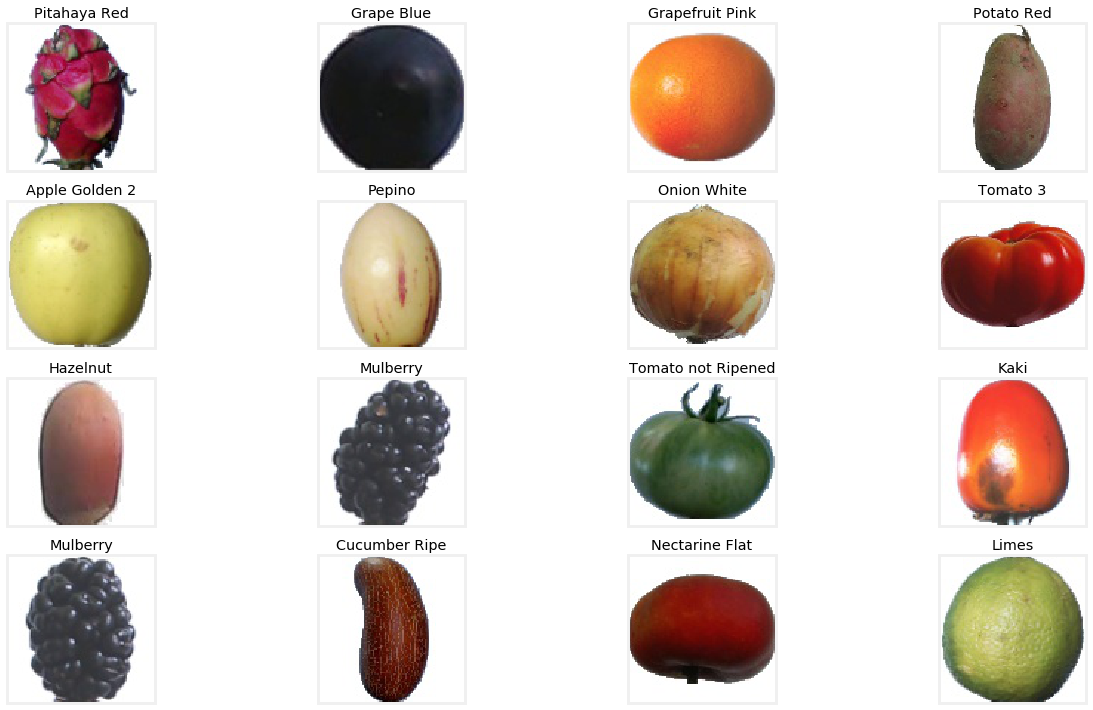

In [8]:
plt.figure(figsize=(19,12.5))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.grid(False)
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    rn=random.randint(0,130)
    ri=random.randint(0,10)
    fruitname=os.listdir(train_path)[rn]
    imgpath=train_path+fruitname+"\\"
    imgpath=imgpath+os.listdir(imgpath)[ri]
    plt.imshow(imread(imgpath))
    plt.title(fruitname)
plt.show()

In [9]:
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image

In [10]:
img1="C:\\Users\\personal\\Desktop\\Transfer learning\\cat.jpg"
img2="C:\\Users\\personal\\Desktop\\Transfer learning\\dog.jpg"
img3="C:\\Users\\personal\\Desktop\\Transfer learning\\flight.jpg"
img4="C:\\Users\\personal\\Desktop\\Transfer learning\\man.jpg"
images=[img1,img2,img3,img4]

In [11]:
def load_image(img_path):
    img=image.load_img(img_path,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    img=preprocess_input(img)
    return img

In [12]:
def get_predictions(model):
    plt.figure(figsize=(26,5))
    for i in range(1,5):
        plt.subplot(1,5,i)
        plt.grid(False)
        plt.gca().set_xticks([])
        plt.gca().set_yticks([])
        plt.imshow(Image.open(images[i-1]).resize((200,200),Image.ANTIALIAS))
    plt.figure(figsize=(32,5))
    for i,imgpath in enumerate(images):
        image=load_image(imgpath)
        pred=decode_predictions(model.predict(image),top=3)[0]
        plt.subplot(1,5,i+1)
        plt.grid(False)
        plt.gca().set_xticks([])
        plt.gca().set_yticks([])
        sns.barplot(x=[j[2] for j in pred],y=[j[1] for j in pred],color="gray")
    plt.show()
    

In [13]:
from keras.applications.vgg16 import VGG16
model = VGG16()

In [14]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [15]:
y_pred=model.predict(load_image(images[0]))
label=decode_predictions(y_pred)
label[0]

[('n02123597', 'Siamese_cat', 0.39014152),
 ('n02328150', 'Angora', 0.2362524),
 ('n02123394', 'Persian_cat', 0.11591287),
 ('n02127052', 'lynx', 0.106168486),
 ('n02123045', 'tabby', 0.019004805)]

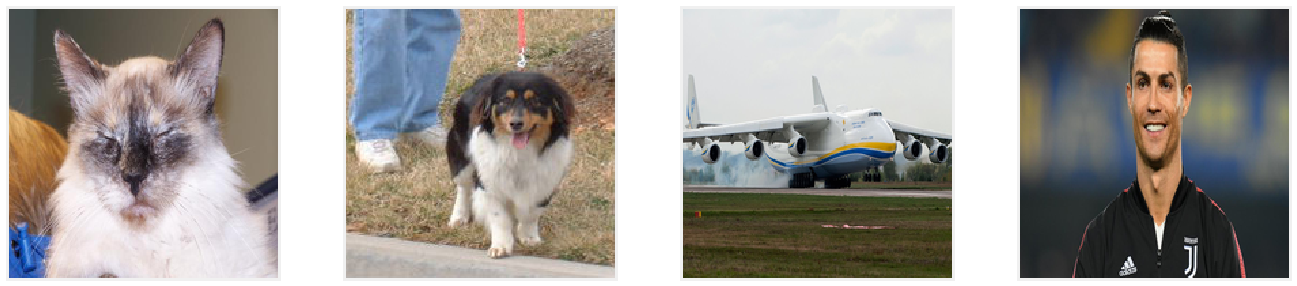

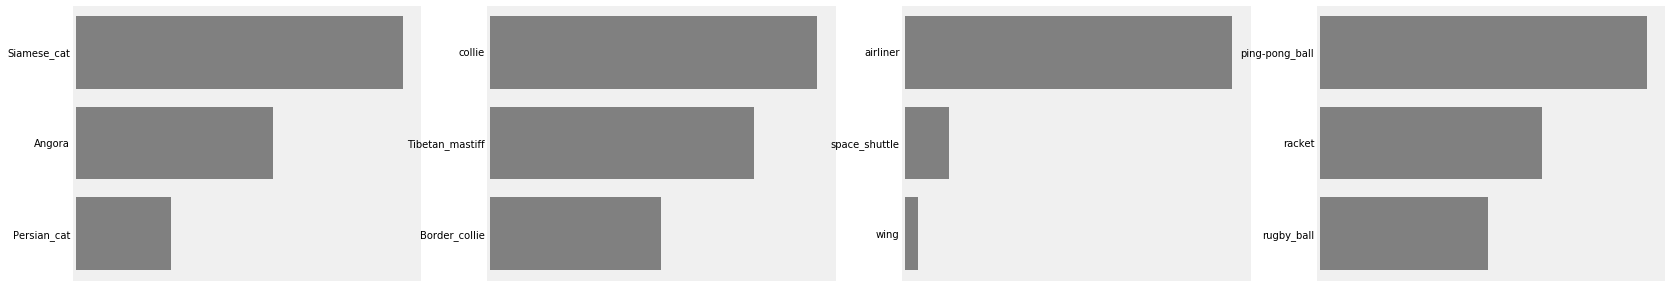

In [16]:
get_predictions(model)

In [17]:
from keras.applications.vgg19 import VGG19
vgg19=VGG19()
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

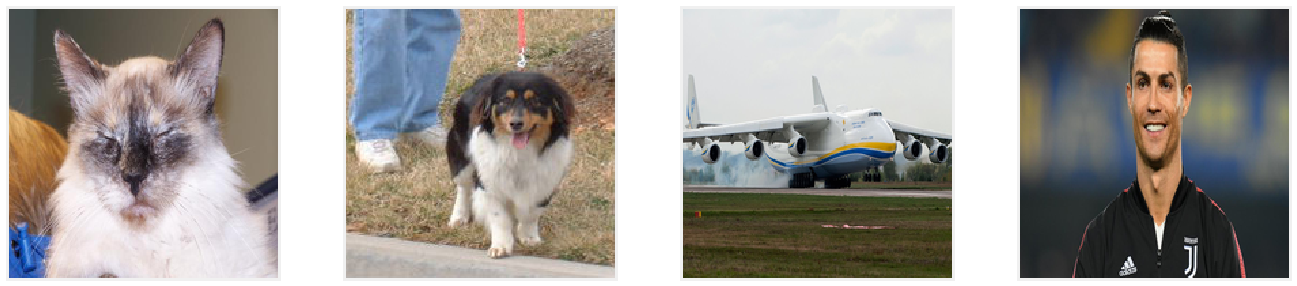

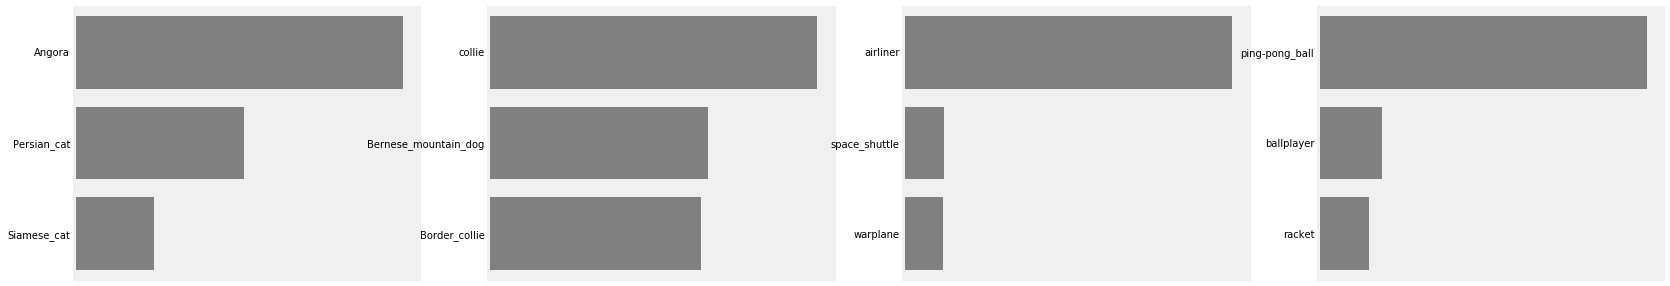

In [18]:
get_predictions(vgg19)

In [19]:
from keras.applications.inception_v3 import InceptionV3
inceptionv3=InceptionV3()
inceptionv3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

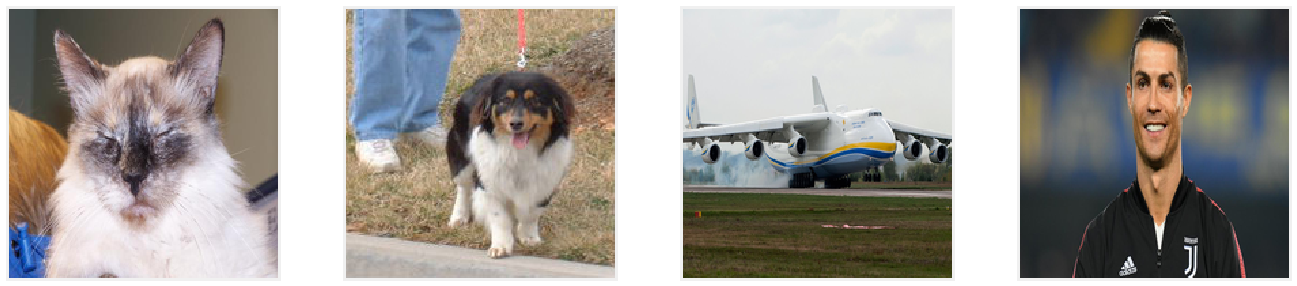

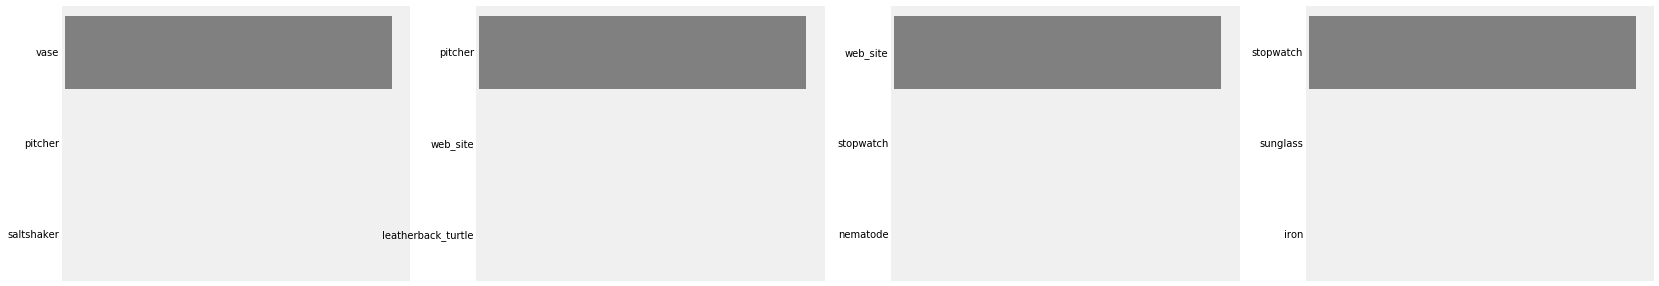

In [20]:
get_predictions(inceptionv3)

In [21]:
from keras.applications.mobilenet import MobileNet
mobilenet=MobileNet()
mobilenet.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

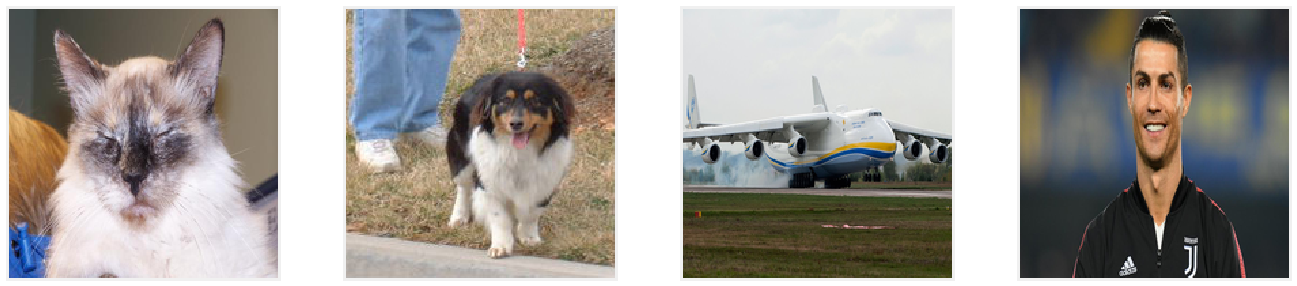

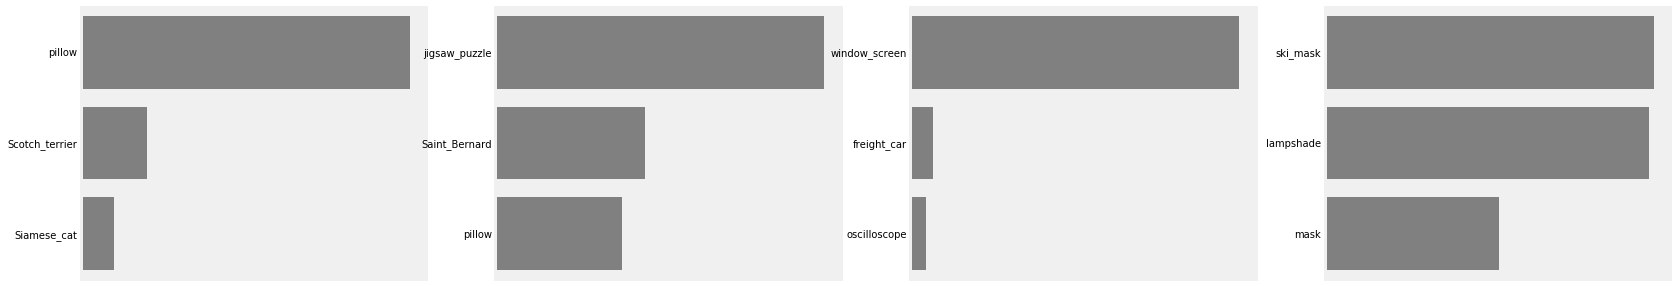

In [22]:
get_predictions(mobilenet)

In [23]:
from keras.applications.resnet import ResNet101
resnet101=ResNet101()
resnet101.summary()

Model: "resnet101"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
__________________________________________________________________________________________

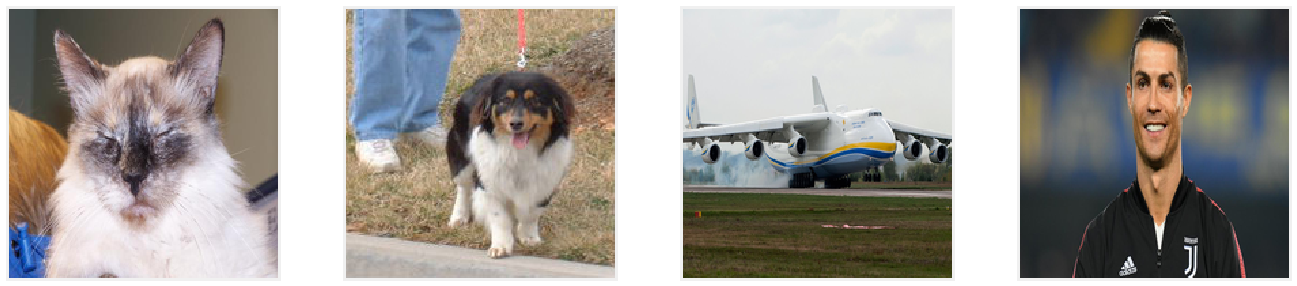

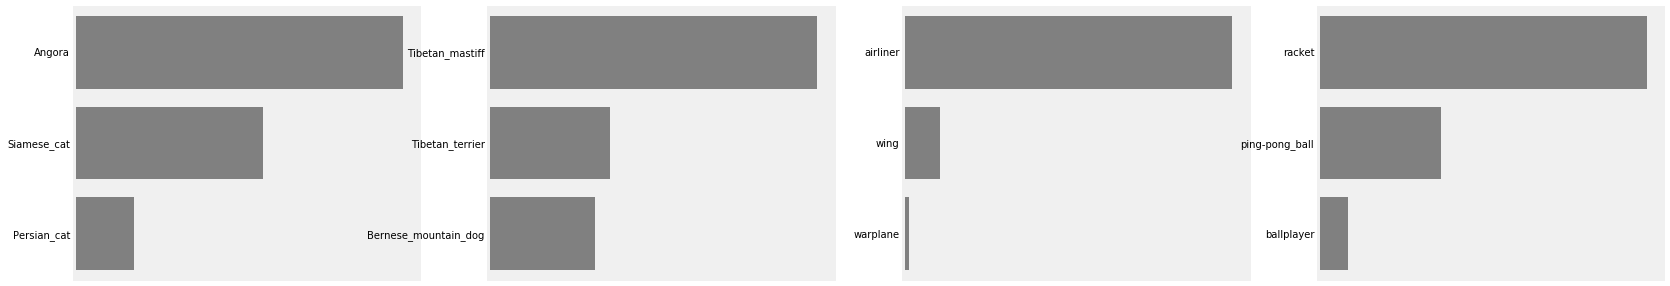

In [24]:
get_predictions(resnet101)

In [25]:
from keras.applications.resnet import ResNet152
resnet152=ResNet152()
resnet152.summary()

Model: "resnet152"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
__________________________________________________________________________________________

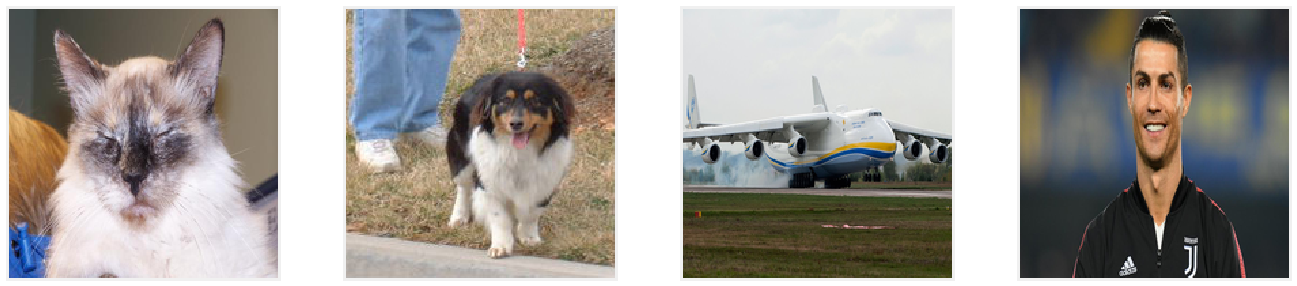

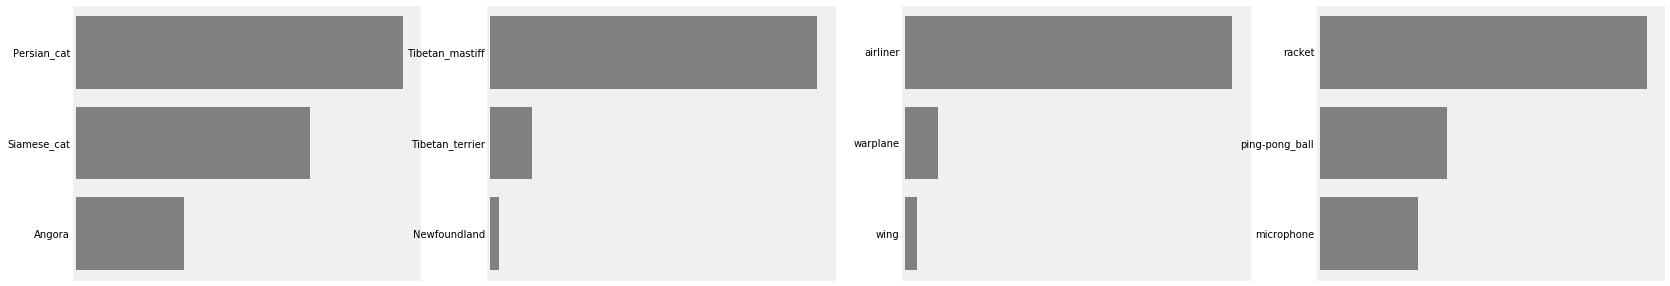

In [26]:
get_predictions(resnet152)

In [27]:
from keras.applications.xception import Xception
xception=Xception()
xception.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_7[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

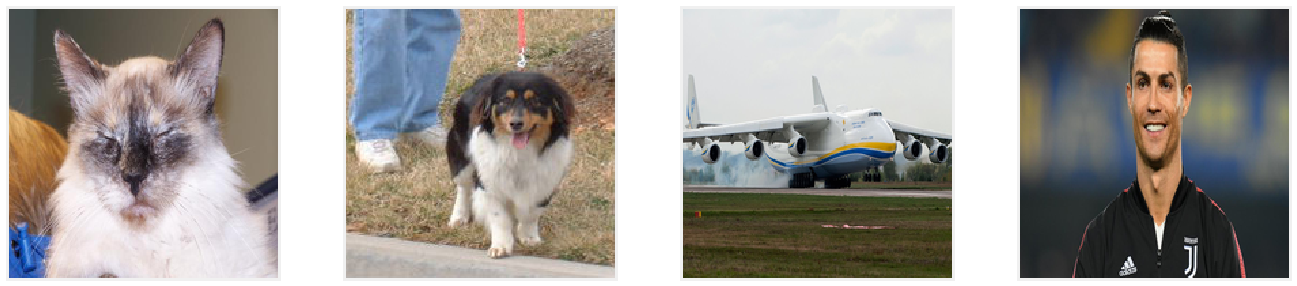

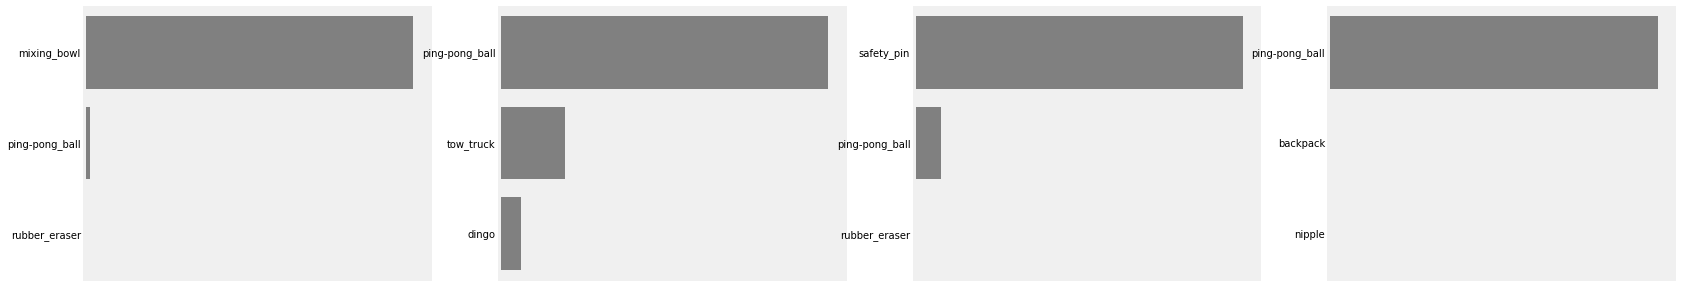

In [28]:
get_predictions(xception)

In [29]:
from glob import glob
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model

In [30]:
image_files = glob(train_path_smalldataset + '/*/*.jp*g')
valid_image_files = glob(test_path_smalldataset + '/*/*.jp*g')

In [31]:
image_size=[100,100]
batch_size=32
epochs=5
folders = glob(train_path_smalldataset + '/*')
vgg16=VGG16(input_shape=image_size+[3],weights="imagenet",include_top=False)

In [32]:
for layer in vgg16.layers:
    layer.trainable=False
    
x=Flatten()(vgg16.output)
#x=Dense(1000,activation='relu')(x)
prediction=Dense(len(folders),activation='softmax')(x)

In [33]:
model=Model(inputs=vgg16.input,outputs=prediction)

In [34]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [35]:
model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

In [36]:
genarator=ImageDataGenerator( rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              vertical_flip=True,
                              preprocessing_function=preprocess_input)

In [37]:
test_gen=genarator.flow_from_directory(test_path_smalldataset,target_size=image_size)
print(test_gen.class_indices)

Found 1375 images belonging to 8 classes.
{'Banana': 0, 'Lemon': 1, 'Onion White': 2, 'Pineapple': 3, 'Raspberry': 4, 'Strawberry': 5, 'Tomato 1': 6, 'Watermelon': 7}


In [38]:
labels=[None]*len(test_gen.class_indices)
for k,v in test_gen.class_indices.items():
    labels[v]=k

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


min: -106.63603 max: 151.061


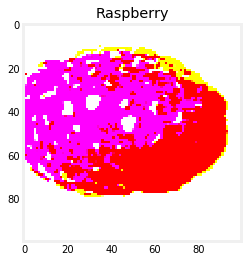

In [39]:
for x,y in test_gen:
    print("min:", x[0].min(), "max:", x[0].max())
    plt.title(labels[np.argmax(y[0])])
    plt.grid(False)
    plt.imshow(x[0])
    plt.show()
    break          

In [40]:
train_genarator=genarator.flow_from_directory(train_path_smalldataset,
                                              target_size=image_size,
                                              shuffle=True,
                                              batch_size=batch_size)

Found 4105 images belonging to 8 classes.


In [41]:
validation_genarator=genarator.flow_from_directory(test_path_smalldataset,
                                              target_size=image_size,
                                              shuffle=False,
                                              batch_size=batch_size)

Found 1375 images belonging to 8 classes.


In [42]:
results=model.fit_generator(train_genarator,
                           validation_data=validation_genarator,
                           epochs=epochs,
                           steps_per_epoch=len(image_files)//batch_size,
                           validation_steps=len(valid_image_files)//batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
128/128 [==============================] - 242s 2s/step - loss: 0.6684 - accuracy: 0.9632 - val_loss: 0.0106 - val_accuracy: 0.9978
Epoch 2/5
128/128 [==============================] - 233s 2s/step - loss: 0.0163 - accuracy: 0.9978 - val_loss: 0.0463 - val_accuracy: 0.9948
Epoch 3/5
128/128 [==============================] - 221s 2s/step - loss: 3.0756e-07 - accuracy: 1.0000 - val_loss: 0.0287 - val_accuracy: 0.9963
Epoch 4/5
128/128 [==============================] - 214s 2s/step - loss: 0.0031 - accuracy: 0.9995 - val_loss: 0.1058 - val_accuracy: 0.9881
Epoch 5/5
128/128 [==============================] - 207s 2s/step - loss: 2.6498e-06 - accuracy: 1.0000 - val_loss: 0.0585 - val_accuracy: 0.9926


In [43]:
from tensorflow.keras.models import model_from_json

In [44]:
model_json=model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")

In [45]:
json_file=open("model.json","r")
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")

In [46]:
loaded_model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [47]:
loaded_model.evaluate_generator(validation_genarator)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.04647897183895111, 0.9934545159339905]

In [48]:
loaded_model.metrics_names

['loss', 'accuracy']

In [49]:
import pandas as pd
loss=pd.DataFrame(model.history.history)

<Figure size 720x432 with 0 Axes>

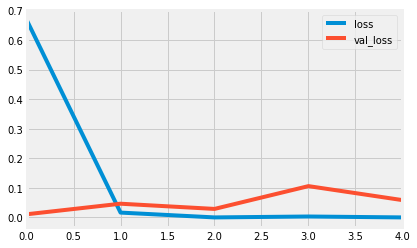

In [50]:
plt.figure(figsize=(10,6))
loss[["loss","val_loss"]].plot()

<Figure size 720x432 with 0 Axes>

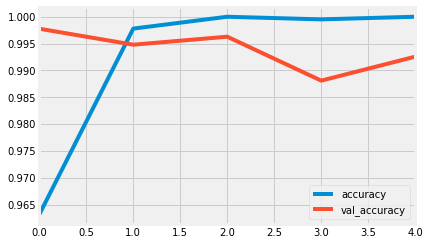

In [51]:
plt.figure(figsize=(10,6))
loss[["accuracy","val_accuracy"]].plot()

In [52]:
y_pred=loaded_model.predict(validation_genarator)

In [53]:
y_pred_classes=np.argmax(y_pred,axis=1)

In [54]:
from sklearn.metrics import confusion_matrix,classification_report

In [55]:
print(confusion_matrix(validation_genarator.classes,y_pred_classes))
print(classification_report(validation_genarator.classes,y_pred_classes))

[[166   0   0   0   0   0   0   0]
 [  0 164   0   0   0   0   0   0]
 [  0   0 141   0   0   5   0   0]
 [  0   0   0 166   0   0   0   0]
 [  0   0   0   0 166   0   0   0]
 [  0   0   0   0   0 164   0   0]
 [  0   0   0   0   0   0 246   0]
 [  0   0   0   0   0   0   0 157]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       166
           1       1.00      1.00      1.00       164
           2       1.00      0.97      0.98       146
           3       1.00      1.00      1.00       166
           4       1.00      1.00      1.00       166
           5       0.97      1.00      0.98       164
           6       1.00      1.00      1.00       246
           7       1.00      1.00      1.00       157

    accuracy                           1.00      1375
   macro avg       1.00      1.00      1.00      1375
weighted avg       1.00      1.00      1.00      1375



In [56]:
img1="C:\\Users\\personal\\Desktop\\Transfer learning\\smalldataset\\banana.jpg"
img2="C:\\Users\\personal\\Desktop\\Transfer learning\\smalldataset\\lemon.jpg"
img3="C:\\Users\\personal\\Desktop\\Transfer learning\\smalldataset\\watermelon.jpg"
img4="C:\\Users\\personal\\Desktop\\Transfer learning\\smalldataset\\pineapple.jpg"
images=[img1,img2,img3,img4]

In [57]:
def image_prediction(imgpath):
    my_image=image.load_img(imgpath,target_size=image_size)
    my_image=image.img_to_array(my_image)
    my_image=np.expand_dims(my_image,axis=0)
    class_type=np.argmax(loaded_model.predict(my_image),axis=1)
    plt.imshow((image.load_img(imgpath)))
    plt.grid(False)
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.xlabel(labels[class_type[0]],color="blue")
    plt.show()

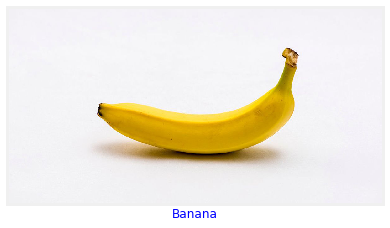

In [58]:
image_prediction(img1)

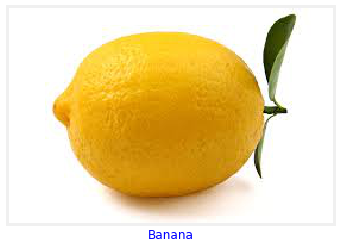

In [59]:
image_prediction(img2)

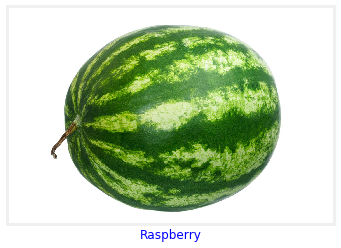

In [60]:
image_prediction(img3)

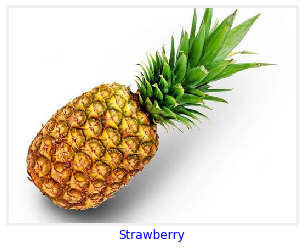

In [61]:
image_prediction(img4)